# Table of Contents

EDA and Statistical Analysis<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; a. [Cost](#Cost)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; b. [Host and Transportation](#Host)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; c. [Bedroom](#Bed)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; d. [Bathroom](#Bath)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; e. [Time as Host](#Time)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; f. [Score Rating](#Rate)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; g. [Cleaniness Rating](#clean)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; h. [Bigram Analysis](#Bigram)<br>

In [1]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from ast import literal_eval

## 2. Exploratory Data Analysis and Statistical Analysis

In [2]:
#import processed data
df = pd.read_csv('../Data/Processed/listings.csv', converters = {
    'name': literal_eval, 'description': literal_eval, 
    'bigram_name': literal_eval, 'bigram_description': literal_eval})

In [3]:
#descriptive statistic of processed data
df.describe()

,Unnamed: 0,host_response_rate,accommodates,bathrooms,bedrooms,beds,price,guests_included,extra_people,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_communication,time_as_host
count,33466.000000,33466.000000,33466.000000,33466.000000,33466.000000,33466.000000,33466.000000,33466.000000,33466.000000,33466.000000,33466.000000,33466.000000,33466.000000,33466.000000
mean,21924.860306,77.094633,3.612323,1.400302,1.378085,1.929779,168.003227,1.925925,15.907936,35.750314,77.530001,7.739616,8.005408,1496.035977
std,12921.002424,39.340823,2.488967,0.763838,0.992202,1.479589,195.133416,1.671385,26.574771,61.110510,37.006450,3.721787,3.801169,811.224391
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,10706.500000,80.000000,2.000000,1.000000,1.000000,1.000000,75.000000,1.000000,0.000000,2.000000,85.000000,8.000000,9.000000,885.000000
50%,21605.500000,100.000000,3.000000,1.000000,1.000000,1.000000,110.000000,1.000000,10.000000,10.000000,95.000000,9.000000,10.000000,1477.000000
75%,33037.750000,100.000000,4.000000,2.000000,2.000000,2.000000,183.750000,2.000000,25.000000,43.000000,99.000000,10.000000,10.000000,2067.000000
max,45051.000000,100.000000,16.000000,6.500000,6.000000,12.000000,1999.000000,16.000000,300.000000,900.000000,100.000000,10.000000,10.000000,4096.000000


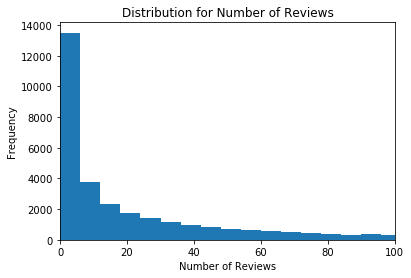

In [4]:
#distribution for the number of reviews
plt.hist(df.number_of_reviews, bins = 150)
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.title('Distribution for Number of Reviews')
plt.xlim((0,100))
plt.show()

In [5]:
print("Percentage of Airbnb home with less than 40 reviews: ", round(sum(df.number_of_reviews < 40)/len(df),2)*100)

print("Percentage of Airbnb home with 0 reviews: ", round(sum(df.number_of_reviews == 0)/len(df),2)*100)

Percentage of Airbnb home with less than 40 reviews:  74.0
Percentage of Airbnb home with 0 reviews:  17.0


As shown, 74% of hosts have less than 40 reviews with more than 50% having under 10 reviews. 17% of the host have 0 reviews on Airbnb. It's rare for host to have more than 60 reviews as the frequency of for higher numbers decays off in an exponential fashion.

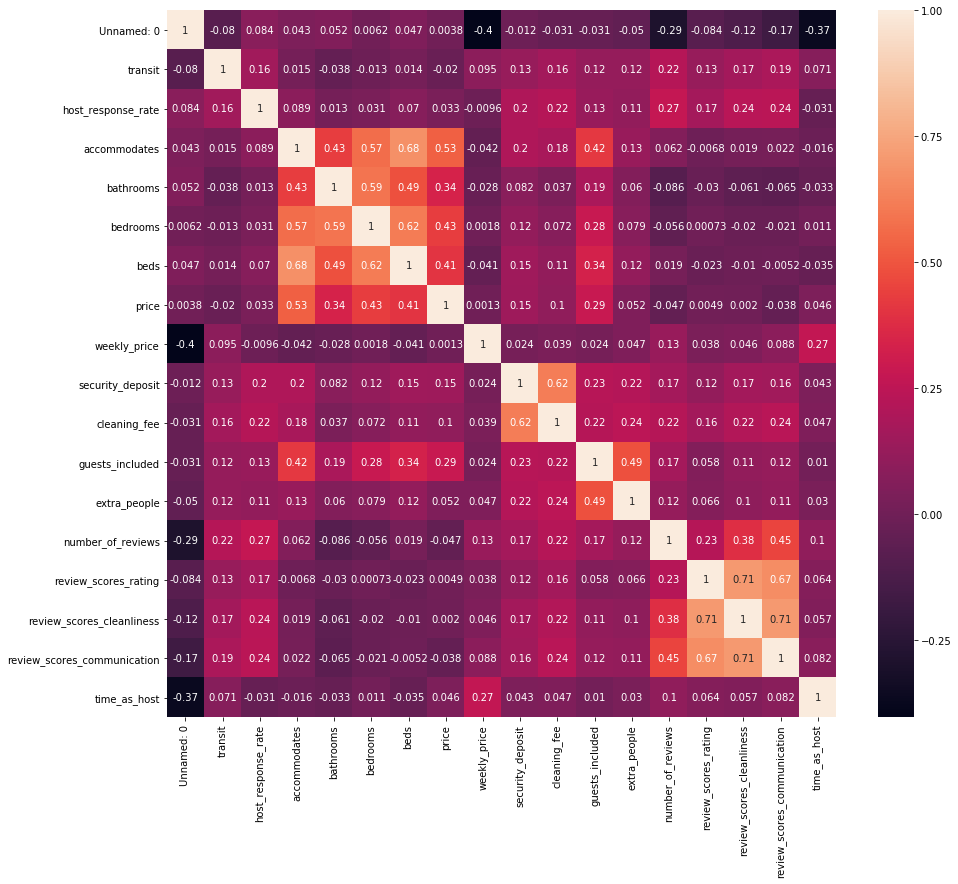

In [6]:
plt.figure(figsize = (15,13))

#get the kendall correlation to account for non linear relationship
corr = df.corr(method = 'kendall')
sns.heatmap(corr, annot = True)

The heatmap show many features with strong collinearly as well as some great predictors for number of reviews. Before removing the collinear features, we like to explore through data visualization and statistical analysis

## 2a. Cost
<a id='Cost'></a>

Text(0.5, 1.0, 'Price Distribution')

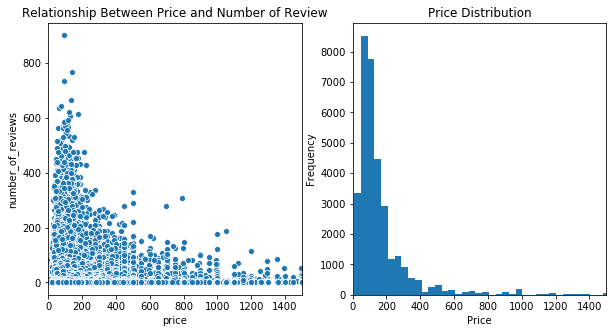

In [7]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.scatterplot(x = 'price', y = 'number_of_reviews', data = df)
plt.xlim((0, 1500))
plt.title("Relationship Between Price and Number of Review")

plt.subplot(1,2,2)
plt.hist(df.price, bins = 50)
plt.ylabel("Frequency")
plt.xlabel("Price")
plt.xlim((0,1500))
plt.title("Price Distribution")

In [8]:
percentage = round(len(df[df.price >= 50][df.price <= 300])/len(df), 4)*100
print("Airbnb for homes between 50 and 300:", percentage, '%')

at_least_one_review = df[df.number_of_reviews > 1]
percentage = round(len(at_least_one_review[at_least_one_review.price >= 50]
                       [at_least_one_review.price <= 300])/len(at_least_one_review), 3)*100

print("Airbnb for homes between 50 and 300 with at least one review:", percentage, '%')

zero_review = df[df.number_of_reviews == 0]
percentage = round(len(zero_review[zero_review.price >= 50]
                       [zero_review.price <= 300])/len(zero_review), 3)*100

print("Airbnb for homes between 50 and 300 with zero review:", percentage, '%')

percentage = round(sum(list(df[df.price >= 50][df.price <= 300]
                      .number_of_reviews))/sum(list(df.number_of_reviews))*100, 2)

print("Percentage of total review counts between 50 and 300:", percentage)

Airbnb for homes between 50 and 300: 80.11 %
Airbnb for homes between 50 and 300 with at least one review: 82.3 %
Airbnb for homes between 50 and 300 with zero review: 73.0 %
Percentage of total review counts between 50 and 300: 88.07


C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


79% of Airbnb homes cost between \\$50 and \\$300. More interestingly if all the homes with 0 reviews were removed, that percentage increases to 82% suggesting price not only impacts how many review recieved but also whether you recieve any review at all. This is also suggested by the 15% reduction in zero review within the said range.

Also is the mean difference in number of reviews at the upper range actually different from that of the lower range or the observed difference is the result of number of samples that were collected. To test this a null hypothesis was conducted. Lets use 150-200 and 750-800 for experimental means

null: μ(\\$150-\\$200) = μ(\\$750-\\$800)<br>

alternative: μ(\\$150-\\$200) != μ(\\$750-\\$800)<br>

α: 0.05

C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


Number of Review Difference between price range $150/$200 and $750/$800 17.36


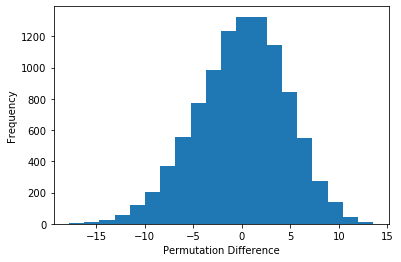

In [9]:
#difference between mean
df150_200 = df[df.price >= 150][df.price <= 200].number_of_reviews
df750_800 =df[df.price >= 750][df.price <= 800].number_of_reviews

mean150_200 = np.mean(df150_200)
mean750_800 = np.mean(df750_800)

diff = mean150_200-mean750_800
concat = pd.concat((df150_200, df750_800))

diff_list = np.empty(10000)
for i in range(10000):
    perm_list = np.random.permutation(concat)
    perm_mean150_200 = np.mean(perm_list[:len(df150_200)])
    perm_mean750_800 = np.mean(perm_list[len(df150_200):])
    diff_list[i] = perm_mean150_200-perm_mean750_800

plt.hist(diff_list, bins = 20)
plt.xlabel('Permutation Difference')
plt.ylabel('Frequency')
print('Number of Review Difference between price range $150/$200 and $750/$800 {}'.format(round(diff, 2)))

In [10]:
pvalue = np.sum(diff_list>=diff)/len(diff_list) + np.sum(diff_list<=-diff)/len(diff_list)

print('p_value: {}'.format(pvalue))

p_value: 0.0001


reject null hypothesis and accept alternative hypothesis that the mean difference of number of reviews between 150-200 Airbnb homes is statistically significant

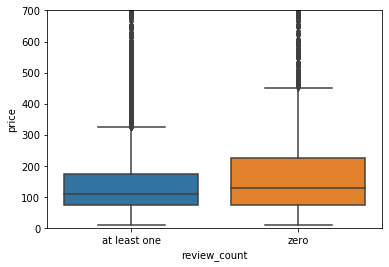

In [11]:
df['review_count'] = df.number_of_reviews.apply(lambda x: 'zero' if x == 0 else 'at least one' )

sns.boxplot(x = 'review_count', y = 'price', data = df)
plt.ylim((0,700))
plt.show()

The boxplot further suggest the observation of the mean mentioned. The upper 50% perentile of zero review are priced higher compared to those of at least one review. Also the spread between 50% to 95% for zero review are wider than that of at least one review. This suggests that price set lower tends to have better outcome with review rates. This makes logical sense because people tends to purchase a product that has higher quality to price ratio. 

## 2b. Host and Transportation
<a id='Host'></a>

In [12]:
proportion = round(sum(df.host_identity_verified == 't')/len(df),3)

print("Proportion of host that are verified: ", proportion)

Proportion of host that are verified:  0.481


It's surprising that most host are not verified in Los Angeles. But how does verification impact price and number of reviews?

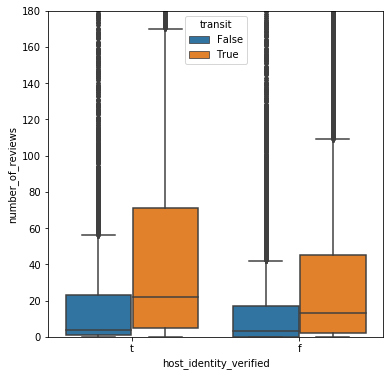

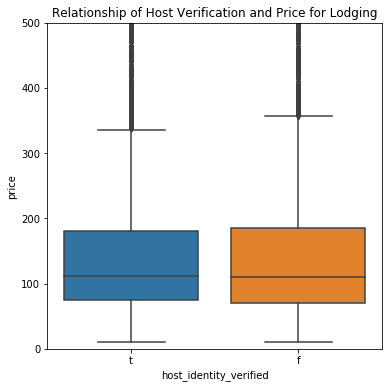

In [13]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'host_identity_verified', y = 'number_of_reviews', data = df, hue = 'transit')
plt.ylim((0,180))
plt.show()

plt.figure(figsize = (6,6))
sns.boxplot(x = 'host_identity_verified', y = 'price', data = df)
plt.ylim((0,500))
plt.title("Relationship of Host Verification and Price for Lodging")
plt.show()

In [14]:
mean_verified = np.mean(df[df.host_identity_verified == 't'].number_of_reviews)
mean_unverified = np.mean(df[df.host_identity_verified == 'f'].number_of_reviews)

print("Mean number of reviews for verified host: ", round(mean_verified,2))
print("Mean number of reviews for unverified host: ", round(mean_unverified,2))

Mean number of reviews for verified host:  43.59
Mean number of reviews for unverified host:  28.47


In [15]:
mean_verified = np.mean(df[df.host_identity_verified == 't'][df.transit == True].number_of_reviews)
mean_unverified = np.mean(df[df.host_identity_verified == 't'][df.transit == False].number_of_reviews)

print("Mean number of reviews for verified host with transit information: ", round(mean_verified,2))
print("Mean number of reviews for verified host without transit information: ", round(mean_unverified,2))

Mean number of reviews for verified host with transit information:  53.01
Mean number of reviews for verified host without transit information:  23.44


C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\sadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [16]:
Mean_verified = np.mean(df[df.host_identity_verified == 't'].price)
Mean_unverified = np.mean(df[df.host_identity_verified == 'f'].price)

print("Mean price of verified host: ", round(Mean_verified,2))
print("Mean price of unverified host: ", round(Mean_unverified,2))

Mean price of verified host:  165.41
Mean price of unverified host:  170.41


In general host identity verification appears to have an impact to the number of reviews. If the host identity is verified, the median and 75% percentile for the number of reviews tends to be higher when compared to host that didn't have their identity verified. This observation is supported by more than 50% in mean number of reviews for verified host compared to unverified host. Also if the transit information is provided, the mean number of review spikes significantly with a change of more than double comparing to that do not provide transit information

However, the median is approximately the same for both types of host. This is also true for the mean with less than 5% difference with arguably similar boxplot structure. Host verification doesn't seem to strongly affect how host price their Airbnb home but those that verified their account benefits from higher review rates. It's noted that unverified hosts statistically tend to price their home higher

## 2c. Bedroom
<a id='Bed'></a>

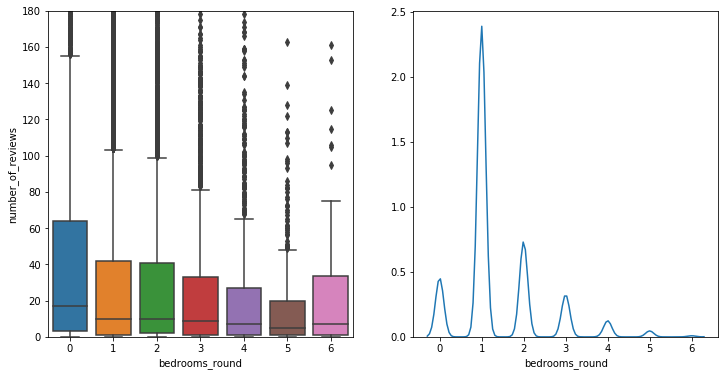

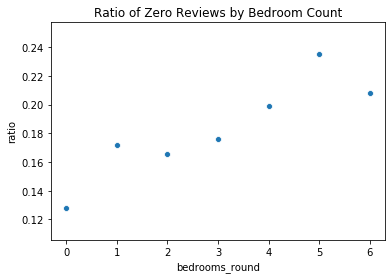

In [17]:
#bedroom were rounded up because some people offer 1.5 bedrooms
df['bedrooms_round'] = df.bedrooms.apply(lambda x: round(x))

fig, axes = plt.subplots(1,2, figsize = (12,6))
sns.boxplot(x = 'bedrooms_round', y = 'number_of_reviews', data = df, ax = axes[0])
axes[0].set_ylim(0,180)

sns.distplot(df.bedrooms_round, bins = 25, ax = axes[1], hist = False)
plt.show()


#ratio between zero reviews and total review by bedrooms
zero_review = df[df.number_of_reviews == 0]
zero = (zero_review.groupby('bedrooms_round')['name']
        .count().rename('zero_review_by_bedrooms'))
total = (df.groupby('bedrooms_round')['name']
         .count()
         .rename('total_review_by_bedrooms'))

#find the ratio between zero and total review count group by bedroom counts
ratio = (zero/total).rename('ratio').reset_index()

#plot relationship between bedrooms and the ratio
sns.scatterplot(x = 'bedrooms_round', y = 'ratio', data = ratio)
plt.title('Ratio of Zero Reviews by Bedroom Count')
plt.show()

A clear pattern for the median number of reviews and it's relationship with the bedroom count. The median number of review decreases as bedroom count increases. We can also see the volume of 1 bedroom airbnb is highest however, the ratio between zero review and total review for 1 bedrooms remains below 0.2 indicating this is the best options when host airbnb their home.

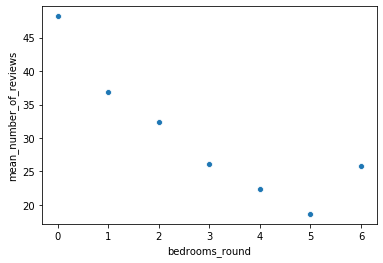

,slope,intercept,correlation,p value
0,-4.054251,42.20008,0.765148,0.009961


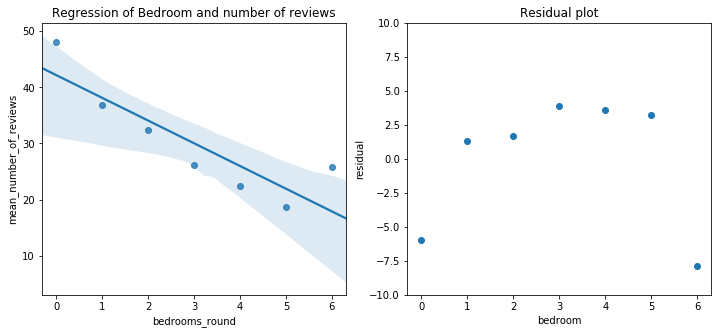

In [18]:
#group by bedrooms and find the mean of number of reviews
bedroom_mean_review = (df.groupby('bedrooms_round')['number_of_reviews']
                       .mean()
                       .rename('mean_number_of_reviews')
                       .reset_index())

#find the pattern between mean number of reviews and bedroom counts
sns.scatterplot(x = 'bedrooms_round', y = 'mean_number_of_reviews', data = bedroom_mean_review)
plt.show()

#plot after removing outliers
fig, axes = plt.subplots(1,2, figsize = (12,5))
sns.regplot(x = 'bedrooms_round', y = 'mean_number_of_reviews', data = bedroom_mean_review.iloc[:12, :], ax = axes[0])
axes[0].set_title('Regression of Bedroom and number of reviews')

#statistical analysis of linear regression
slope, intercept, r, p, stderr = stats.linregress(bedroom_mean_review.bedrooms_round[:12], 
                                                  bedroom_mean_review.mean_number_of_reviews[:12])
#create table for the stats of linear regression
dic = {'slope': [slope], 'intercept': [intercept], 'correlation': [r**2], 'p value': [p]}


#plot residual plot
y = slope*bedroom_mean_review.bedrooms_round+intercept
residual = y-bedroom_mean_review.mean_number_of_reviews
axes[1].scatter(bedroom_mean_review.bedrooms_round[:12], residual[:12])
axes[1].set_title('Residual plot')
axes[1].set_xlabel('bedroom')
axes[1].set_ylabel('residual')
axes[1].set_ylim((-10,10))
pd.DataFrame(dic)

The regression shows a strong correlation value between bedroom counts and mean of number of review. The slope indicates for every bedroom, there would be a mean reduction in review counts by 4. The residual plot shows randomized pattern of the residual indicating this is a good model for relationship between bedroom and mean number of review

With p value of 0.01, the null hypothesis is rejected and that a change in bedroom counts would induce a change in number of reviews

## 2d. Bathroom
<a id='Bath'></a>

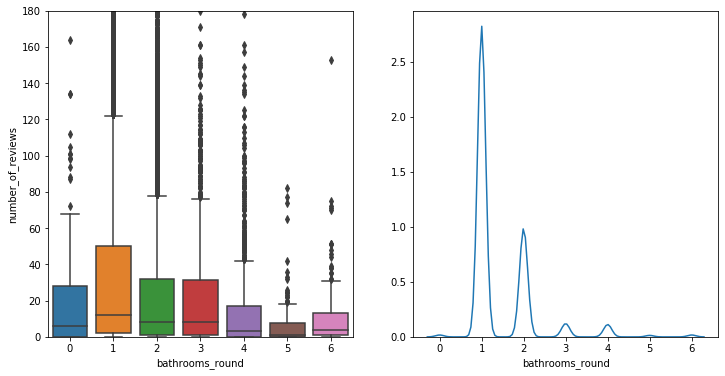

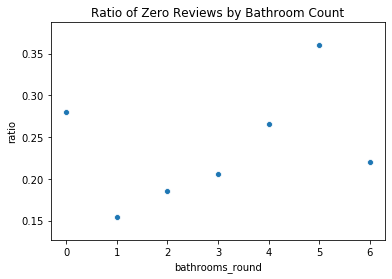

In [19]:
#round up the bathroom count to nearest integer
df['bathrooms_round'] = df.bathrooms.apply(lambda x: round(x))

#plot the bar graph for the for bathroom count and number of reviws
fig, axes = plt.subplots(1,2, figsize = (12,6))
sns.boxplot(x = 'bathrooms_round', y = 'number_of_reviews', data = df, ax = axes[0])
axes[0].set_ylim(0,180)

sns.distplot(df.bathrooms_round, bins = 30, ax = axes[1], hist = False)
plt.show()

#ratio between zero reviews and total review by bedrooms
zero_review = df[df.number_of_reviews == 0]
zero = (zero_review.groupby('bathrooms_round')['name']
        .count().rename('zero_review_by_bathrooms'))
total = (df.groupby('bathrooms_round')['name']
         .count()
         .rename('total_review_by_bathrooms'))

#find the ratio between zero and total review counts groupby bathroom counts
ratio = (zero/total).rename('ratio').reset_index()

#plot the ratio and bathroom counts
sns.scatterplot(x = 'bathrooms_round', y = 'ratio', data = ratio)
plt.title('Ratio of Zero Reviews by Bathroom Count')
plt.show()

Median number of reviews decreases as bathroom counts increases with exception of 0 bathroom and 6 bathrooms. This again shows that even though bathroom of 1 is offered most on airbnb, it has the lowest zero review ratio at less than 0.2

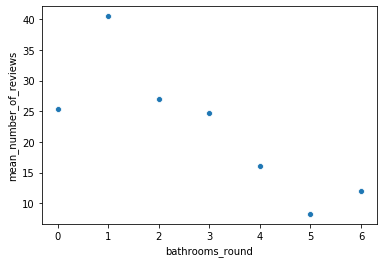

,slope,intercept,correlation,p value
0,-5.92953,42.173191,0.88345,0.005306


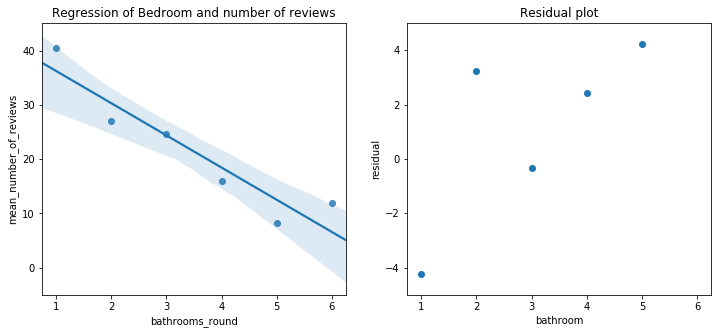

In [20]:
#find mean reviews group by bathroom
bathrooms_mean_review = (df.groupby('bathrooms_round')['number_of_reviews']
                         .mean()
                         .rename('mean_number_of_reviews')
                         .reset_index())

sns.scatterplot(x = 'bathrooms_round', y = 'mean_number_of_reviews', data = bathrooms_mean_review)
plt.show()

fig, axes = plt.subplots(1,2, figsize = (12,5))
sns.regplot(x = 'bathrooms_round', y = 'mean_number_of_reviews', data = bathrooms_mean_review[1:8], ax = axes[0])
axes[0].set_title('Regression of Bedroom and number of reviews')

#statistical analysis of linear regression
slope, intercept, r, p, stderr = stats.linregress(bathrooms_mean_review.bathrooms_round[1:8], 
                                                  bathrooms_mean_review.mean_number_of_reviews[1:8])
#create table for the stats of linear regression
dic = {'slope': [slope], 'intercept': [intercept], 'correlation': [r**2], 'p value': [p]}


#plot residual plot
y = slope*bathrooms_mean_review.bathrooms_round+intercept
residual = y-bathrooms_mean_review.mean_number_of_reviews
axes[1].scatter(bathrooms_mean_review.bathrooms_round[1:8], residual[1:8])
axes[1].set_title('Residual plot')
axes[1].set_xlabel('bathroom')
axes[1].set_ylabel('residual')
axes[1].set_ylim((-5,5))
pd.DataFrame(dic)

From the scatter plot the relationship between bathroom and mean number of reviews could be segmented into two sections separated by 0 bathrooms and more than 0 bathrooms. Homes with 0 bedrooms have less mean number of reviews than those of its neighbors. After removing 0 bathroom, linear regression fits well with a p value of 0.005 and thus shows statistical significance between mean number of reviews and bathroom counts.

## 2e. Time as Host
<a id='Time'></a>

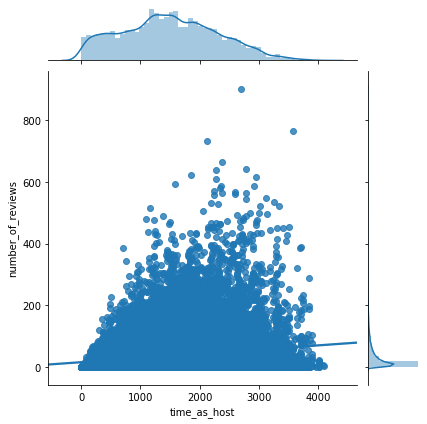

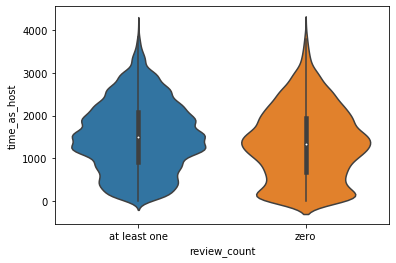

In [21]:
#relationship between time as host and number of reviews
sns.jointplot(x = 'time_as_host', y = 'number_of_reviews', data = df, kind = 'reg')
plt.show()

#relationship between time as host and zero views and at least one review
sns.violinplot(x = 'review_count', y = 'time_as_host', data = df)

In [22]:
zero_time = np.mean(df[df.review_count == 'zero'].time_as_host)
oneplus_time = np.mean(df[df.review_count == 'at least one'].time_as_host)

print("Mean time as host with zero review: ", round(zero_time,2), 'days')
print("Mean time as host with at least one review: ", round(oneplus_time,2), 'days')

zero_time = np.median(df[df.review_count == 'zero'].time_as_host)
oneplus_time = np.median(df[df.review_count == 'at least one'].time_as_host)

print("Median time as host with zero review: ", round(zero_time,2), 'days')
print("Median time as host with at least one review: ", round(oneplus_time,2), 'days')

Mean time as host with zero review:  1351.2 days
Mean time as host with at least one review:  1525.25 days
Median time as host with zero review:  1343.0 days
Median time as host with at least one review:  1505.0 days


The distribution for time as host do not appear to be uniform as expected but peaks between 1500 and 2000 days. (fig. 7) This behavior could be understood in three stages. From right to middle, Airbnb experienced a raise in popularity and homeowners began joining the platform. Then the number of people joined peaked and the platform experienced a deceleration of homeowners joining the platform. Then a constant number of people began joining every year without much growth and saturates out. When examining the violin plot for zero review counts, we observed two peaks where one is around 1500 days and another at around 0, which at first is surprising because it would be logical that as time passes, zero review frequency tends to decrease. These two peaks could be explained logically and the general distribution. The peak close to zero days results from homeowners whom just joined the platform and have experience no or little booking from travelers. On the other hand, the other peak at 1500 days is the result of the saturation in demand while supply of Airbnb homes increase as shown in the general distribution. 

The scatter plot shows a general positive correlation considering the regression line and the maximum number of reviews at set time intervals. However, the scatterplot does not show whether the linear regression line is the best regression fit. To measure the underlying behavior of time and number of reviews, mean number of reviews as a function of interval time was conducted.


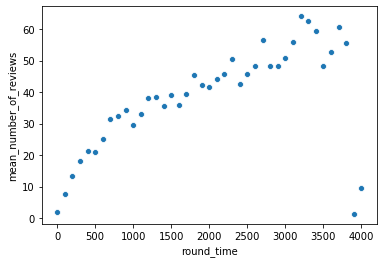

In [23]:
#create dataset segments time to 100 days and create a mean number of reviews
df['round_time'] = df['time_as_host'].apply(lambda x: x//100*100)
time_review = df.groupby('round_time')['number_of_reviews'].mean().rename('mean_number_of_reviews').reset_index()

sns.scatterplot(x = 'round_time', y = 'mean_number_of_reviews', data = time_review)

With a few exception, the relationship between time and mean number of review is quadratic in appearance. We can apply a transformation method to create a linear relationship. Since we do not want to change number of reviews in the general dataset, lets transform the time by square rooting the values

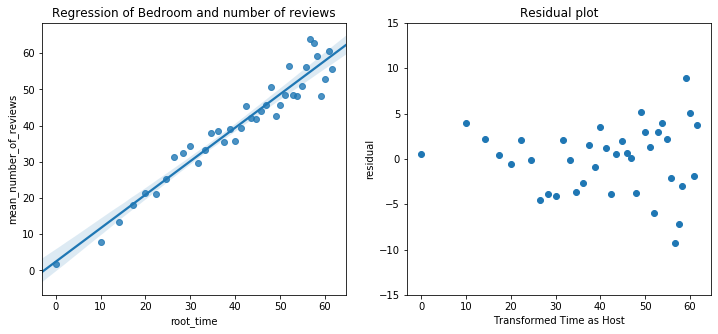

,slope,intercept,correlation,p value
0,0.925638,2.408818,0.937048,8.127345e-24


In [24]:
remove = []
for number in time_review.index:
    #condition for removing points
    if (time_review.iloc[number, :].round_time > 3000) and (time_review.iloc[number, :].mean_number_of_reviews < 20):
        remove.append(number)

#remove the two data points
time_review = time_review.drop(index = remove)

#apply square root transformation
time_review['root_time'] = time_review.round_time.apply(lambda x: np.sqrt(x))

#plot the regression plot
fig, axes = plt.subplots(1,2, figsize = (12,5))
sns.regplot(x = 'root_time', y = 'mean_number_of_reviews', data = time_review, ax = axes[0])
axes[0].set_title('Regression of Bedroom and number of reviews')

#statistical analysis of linear regression
slope, intercept, r, p, stderr = stats.linregress(time_review.root_time, 
                                                  time_review.mean_number_of_reviews)
#create table for the stats of linear regression
dic = {'slope': [slope], 'intercept': [intercept], 'correlation': [r**2], 'p value': [p]}


#plot residual plot
y = slope*time_review.root_time+intercept
residual = y-time_review.mean_number_of_reviews
axes[1].scatter(time_review.root_time, residual)
axes[1].set_title('Residual plot')
axes[1].set_xlabel('Transformed Time as Host')
axes[1].set_ylabel('residual')
axes[1].set_ylim((-15,15))
plt.show()
pd.DataFrame(dic)

The regression plot after transformation exhibit very strong correlation between time as host and mean number of reviews. It shows that the mean number of reviews increases by one for every square root of time as host. The residual plot also shows randomized pattern suggesting that there may not be any underlying pattern.

In [25]:
#transform time_as_host in the official dataset
df['time_as_host'] = df.time_as_host.apply(lambda x: np.sqrt(x))

In [26]:
#statistical analysis of linear regression for the actual data after transformation
slope, intercept, r, p, stderr = stats.linregress(df.time_as_host, 
                                                  df.number_of_reviews)
#create table for the stats of linear regression
dic = {'slope': [slope], 'intercept': [intercept], 'correlation': [r**2], 'p value': [p]}
pd.DataFrame(dic)

,slope,intercept,correlation,p value
0,0.980075,-0.337451,0.036067,2.713072e-269


With very low p-value, we reject the null hypothesis that time as host is independent from number of reviews. Correlation is measured far lower at 0.035

## 2f. Score Rating
<a id='Rate'></a>

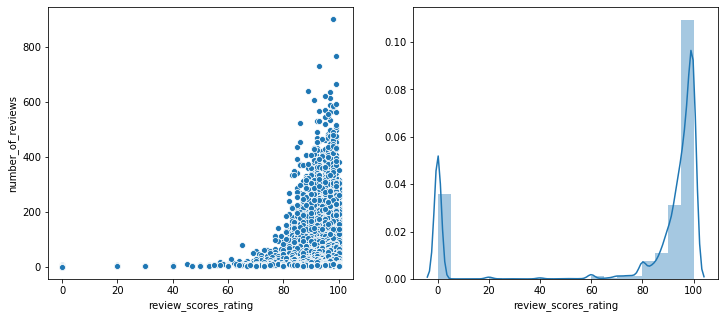

In [27]:
#review scores rating and number of reviews plots
fig, axes = plt.subplots(1,2, figsize = (12,5))
sns.scatterplot(x = 'review_scores_rating', y = 'number_of_reviews', data = df, ax = axes[0])

sns.distplot(df.review_scores_rating, bins = 20, ax = axes[1])

In [28]:
high_review_score = sum(df.review_scores_rating >=90)/len(df)

print('Ratio of Airbnb home with 90 or higher review scores:', round(high_review_score,2))

Ratio of Airbnb home with 90 or higher review scores: 0.7


First to clarify, the 0 review score rating corresponds to the data manipulation we conducted where we filled the null values with 0. However, it should be note that as the rating score increase, the maximum number of reviews increases accordingly and the increased could be discribed as an exponential increase in max value. Also most airbnb homes scores higher than 90 in their ratings. It's good to note that if an airbnb home scores below 80, it would be difficult for the home to have high review counts.

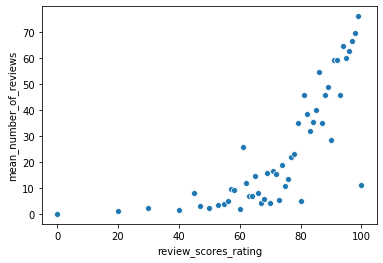

In [29]:
#group by review score and calculate mean for number of reviews
rating = df.groupby('review_scores_rating')['number_of_reviews'].mean().rename('mean_number_of_reviews').reset_index()

sns.scatterplot(x ='review_scores_rating', y = 'mean_number_of_reviews', data = rating)

The mean number of reviews exhibit similar behavior as the max values in the scatter plot seen prior. There is a clear exponential increase in mean number of review and we can transform the data to reflect the linear regression model. However, we must drop the number of review for 100 as it deviates substantally from the general trend

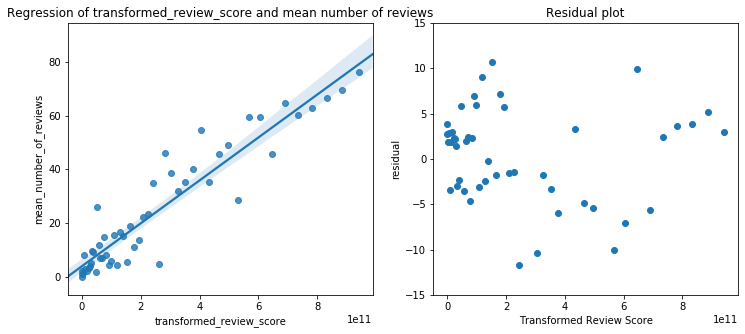

,slope,intercept,correlation,p value
0,7.976796e-11,3.968496,0.884807,4.087042e-25


In [30]:
#drop the last review and transformed review score
rating = rating.drop(index = len(rating)-1)
rating['transformed_review_score'] = rating['review_scores_rating'].apply(lambda x: x**6)

#plot the regression plot
fig, axes = plt.subplots(1,2, figsize = (12,5))
sns.regplot(x ='transformed_review_score', y = 'mean_number_of_reviews', data = rating, ax = axes[0])
axes[0].set_title('Regression of transformed_review_score and mean number of reviews')

#statistical analysis of linear regression
slope, intercept, r, p, stderr = stats.linregress(rating.transformed_review_score, 
                                                  rating.mean_number_of_reviews)
#create table for the stats of linear regression
dic = {'slope': [slope], 'intercept': [intercept], 'correlation': [r**2], 'p value': [p]}


#plot residual plot
y = slope*rating.transformed_review_score+intercept
residual = y-rating.mean_number_of_reviews
axes[1].scatter(rating.transformed_review_score, residual)
axes[1].set_title('Residual plot')
axes[1].set_xlabel('Transformed Review Score')
axes[1].set_ylabel('residual')
axes[1].set_ylim((-15,15))
plt.show()
pd.DataFrame(dic)

Strong linear correlation between transformed review score and mean number of reviews. The review score was raised to the power of 6 to have this linear affect. The residual plot shows no apparent pattern suggesting this is a good model

In [31]:
#apply transformation to review score
df['review_scores_rating'] = df.review_scores_rating.apply(lambda x: x**6)

In [32]:
#statistical analysis of linear regression for actual data
slope, intercept, r, p, stderr = stats.linregress(df.review_scores_rating, 
                                                  df.number_of_reviews)
#create table for the stats of linear regression
dic = {'slope': [slope], 'intercept': [intercept], 'correlation': [r**2], 'p value': [p]}
pd.DataFrame(dic)

,slope,intercept,correlation,p value
0,3.783435e-11,11.929815,0.050709,0.0


The p-value for the transformation is 0 which we can reject the null hypothesis. The slope is extremely small because this is a tranformed dataset where we raised the review score rate to the 6th power. However, the correlation value is small

## 2g. Cleanliness Score
<a id='Clean'></a>

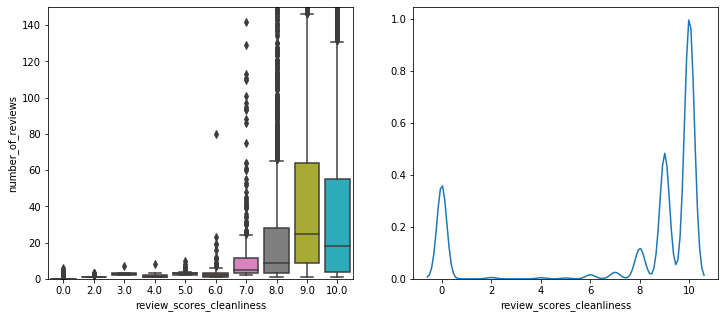

In [33]:
fig, axes = plt.subplots(1,2, figsize = (12,5))

#score of the cleaniness and number of reviews
sns.boxplot(x = 'review_scores_cleanliness', y = 'number_of_reviews', data = df, ax = axes[0])
axes[0].set_ylim((0,150))

#distribution of the score for cleaniness
sns.distplot(df.review_scores_cleanliness, hist = False, ax = axes[1])

Again the 0 review scores are filled data. However it's clear that very few airbnb home exhibit cleaniness score of less than 8 and according to the bar graph, a score less than 6 would result in low median number of reviews

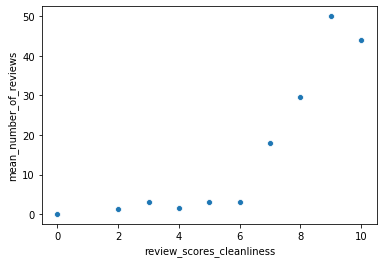

In [34]:
#group by score for cleaniness and number of reviews
rating = (df.groupby('review_scores_cleanliness')['number_of_reviews']
          .mean()
          .rename('mean_number_of_reviews')
          .reset_index())

sns.scatterplot(x ='review_scores_cleanliness', y = 'mean_number_of_reviews', data = rating)

The cleaniness score appears to have similar pattern as the overall score with an exponential increase in mean number of reviews as a function of cleaniness

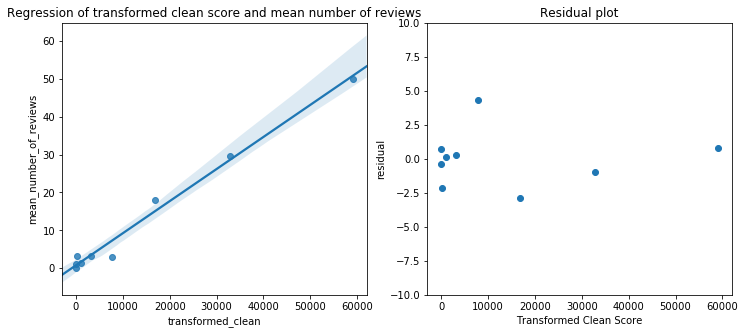

,slope,intercept,correlation,p value
0,0.000845,0.82647,0.985598,1.049132e-07


In [35]:
rating = rating.drop(index = len(rating)-1)
rating['transformed_clean'] = rating['review_scores_cleanliness'].apply(lambda x: x**5)

#plot the regression plot
fig, axes = plt.subplots(1,2, figsize = (12,5))
sns.regplot(x ='transformed_clean', y = 'mean_number_of_reviews', data = rating, ax = axes[0])
axes[0].set_title('Regression of transformed clean score and mean number of reviews')

#statistical analysis of linear regression
slope, intercept, r, p, stderr = stats.linregress(rating.transformed_clean, 
                                                  rating.mean_number_of_reviews)
#create table for the stats of linear regression
dic = {'slope': [slope], 'intercept': [intercept], 'correlation': [r**2], 'p value': [p]}


#plot residual plot
y = slope*rating.transformed_clean+intercept
residual = y-rating.mean_number_of_reviews
axes[1].scatter(rating.transformed_clean, residual)
axes[1].set_title('Residual plot')
axes[1].set_xlabel('Transformed Clean Score')
axes[1].set_ylabel('residual')
axes[1].set_ylim((-10,10))
plt.show()
pd.DataFrame(dic)

Again strong linear correlation between transformed clean score and mean number of reviews. The review score was raised to the power of 5 to have this linear affect. The residual plot shows no apparent pattern suggesting this is a good model. This may have too strong of a correlation to overall review score and may affect machine learning models

In [36]:
#transform cleanliness score data
df['review_scores_cleanliness'] = df.review_scores_cleanliness.apply(lambda x: x**5)

In [37]:
#statistical analysis of linear regression for actual data
slope, intercept, r, p, stderr = stats.linregress(df.review_scores_cleanliness, 
                                                  df.number_of_reviews)
#create table for the stats of linear regression
dic = {'slope': [slope], 'intercept': [intercept], 'correlation': [r**2], 'p value': [p]}
pd.DataFrame(dic)

,slope,intercept,correlation,p value
0,0.00039,10.010466,0.061823,0.0


The p-value for the transformation is 0 which we can reject the null hypothesis. The slope is extremely small because this is a tranformed dataset where we raised the review score rate to the 5th power. However, the correlation value is small

## 2h. Bigram Analysis
<a id='Bigram'></a>

In [38]:
#count the bigram words in bigram name
cnt_bigram_name = Counter()
for row in df.bigram_name:
    for bigram in row:
        cnt_bigram_name[bigram]+=1

[Text(0, 0, "('private', 'room')"),
 Text(0, 0, "('los', 'angeles')"),
 Text(0, 0, "('venice', 'beach')"),
 Text(0, 0, "('beverly', 'hill')"),
 Text(0, 0, "('guest', 'house')"),
 Text(0, 0, "('hollywood', 'hill')"),
 Text(0, 0, "('west', 'hollywood')"),
 Text(0, 0, "('santa', 'monica')"),
 Text(0, 0, "('downtown', 'la')"),
 Text(0, 0, "('private', 'bedroom')"),
 Text(0, 0, "('echo', 'park')"),
 Text(0, 0, "('ocean', 'view')"),
 Text(0, 0, "('one', 'bedroom')"),
 Text(0, 0, "('long', 'beach')"),
 Text(0, 0, "('heart', 'hollywood')")]

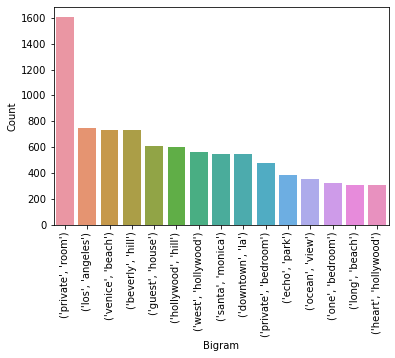

In [39]:
Frame = pd.DataFrame(cnt_bigram_name.most_common(15))
Frame.columns = ['Bigram', 'Count']
g = sns.barplot(x = 'Bigram', y = 'Count', data = Frame)
g.set_xticklabels(labels = Frame.Bigram, rotation=90)

Almost all the words mentioned are location dependent. But 'private room' and 'master bedroom' seems to be very common bigrams.
How does the words in the general trend differ from those with zero reviews and those that have at least 1 reviews?

In [40]:
#count the bigram words in bigram name
cnt_zero = Counter()
for row in zero_review.bigram_name:
    for bigram in row:
        cnt_zero[bigram]+=1
        
cnt_one_more = Counter()
for row in at_least_one_review.bigram_name:
    for bigram in row:
        cnt_one_more[bigram]+=1

Text(0.5, 1.0, 'At Least One Review')

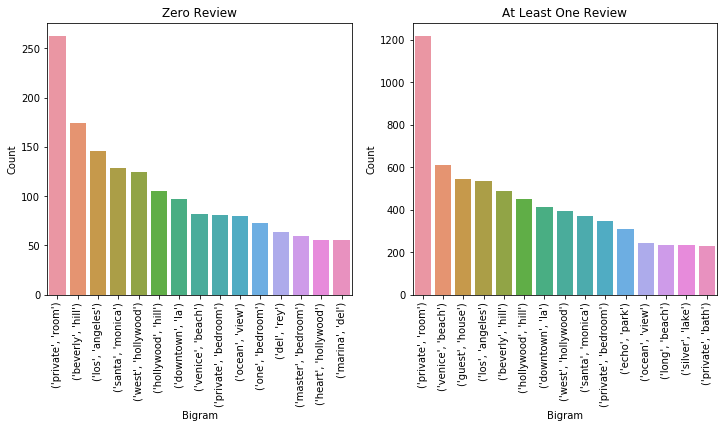

In [41]:
zero_Frame = pd.DataFrame(cnt_zero.most_common(15))
zero_Frame.columns = ['Bigram', 'Count']

more_Frame = pd.DataFrame(cnt_one_more.most_common(15))
more_Frame.columns = ['Bigram', 'Count']

fig, axes = plt.subplots(1,2, figsize = (12,5))
g = sns.barplot(x = 'Bigram', y = 'Count', data = zero_Frame, ax = axes[0])
g.set_xticklabels(labels = zero_Frame.Bigram, rotation=90)
g.set_title('Zero Review')

g = sns.barplot(x = 'Bigram', y = 'Count', data = more_Frame, ax = axes[1])
g.set_xticklabels(labels = more_Frame.Bigram, rotation=90)
g.set_title('At Least One Review')

Both bigram shares similar trends with primarly location oriented words. Lets look at the highest ratio of  zero review bigram to at least one review bigram

Text(0.5, 1.0, 'Bigram with Highest Zero Review Ratio')

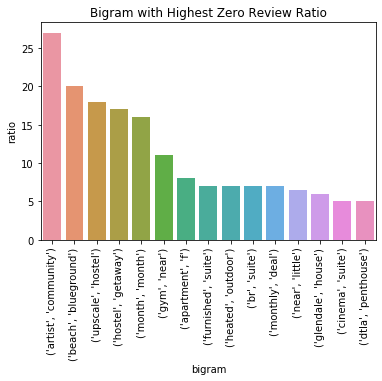

In [42]:
ratio_bigram = []
for bigram, value in cnt_one_more.items():
    if bigram in cnt_zero:
        ratio_bigram.append([bigram, cnt_zero[bigram]/value])
    else:
        ratio_bigram.append([bigram,0])
ratio_bigram.sort(key = lambda x: x[1], reverse = True)

ratio_frame = pd.DataFrame(ratio_bigram)
ratio_frame.columns = ['bigram', 'ratio']

g = sns.barplot(x = 'bigram', y = 'ratio', data = ratio_frame.iloc[:15])
g.set_xticklabels(labels = ratio_frame.iloc[:15].bigram, rotation=90)
g.set_title('Bigram with Highest Zero Review Ratio')

Phrases that tends to have high zero review to at least one review ratio tends places that seems low scale with words like "hostel" and suite and words that seems to communicate sharing the space like "common". The word "gym" doesn't seem favorable too.

Text(0.5, 1.0, 'Bigram with Highest at Least One Review Ratio')

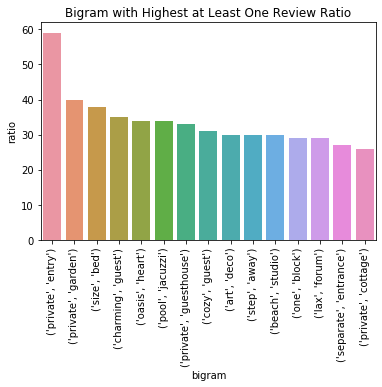

In [43]:
ratio_bigram = []
for bigram, value in cnt_zero.items():
    if bigram in cnt_one_more:
        ratio_bigram.append([bigram, cnt_one_more[bigram]/value])
    else:
        ratio_bigram.append([bigram,0])
ratio_bigram.sort(key = lambda x: x[1], reverse = True)

ratio_frame = pd.DataFrame(ratio_bigram)
ratio_frame.columns = ['bigram', 'ratio']

g = sns.barplot(x = 'bigram', y = 'ratio', data = ratio_frame.iloc[:15])
g.set_xticklabels(labels = ratio_frame.iloc[:15].bigram, rotation=90)
g.set_title('Bigram with Highest at Least One Review Ratio')

<a id='Learning'></a>

In [44]:
#save changes to new csv
df.to_csv('../Data/Processed/After_EDA_listings.csv')